# Visualising The Chicago Crime Data

To get a better understanding of the Chicago Crime Dataset it will be helpful to visualise the data.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
# Import Pandas
import pandas as pd

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

font = {'size'   : 14}
mpl.rc('font', **font)

# Use Folium to display the Maps for Visualisation
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import the Pickle of the DataFrame
df_crimes = pd.read_pickle('/content/gdrive/My Drive/Coursera_Capstone-week5/anh/capstone_pickles/crimes.pkl')

### Number of Crimes per month

Text(0.0, 1.0, 'Count of Cases Per Month')

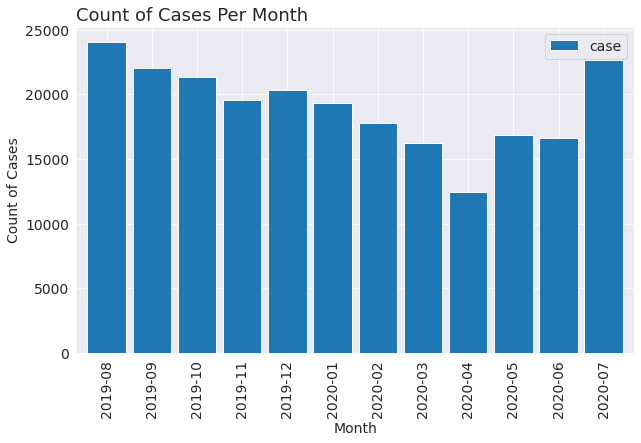

In [5]:
# Group the Crimes per month and produce a bar chart
df_crimes.groupby('year_month').count().plot(y = 'case', 
                                             kind='bar',
                                             figsize=(10,6),
                                             width=0.85,
                                             colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases')
plt.title('Count of Cases Per Month', loc='left', fontsize=18)

Unsuprisingly there little obvious variation in the number of crimes committed per month other than an apparent drop-off in April. 

### Number of crimes occuring on each day

Text(0.0, 1.0, 'Count of Cases Per Day of Week [1 is a SUNDAY]')

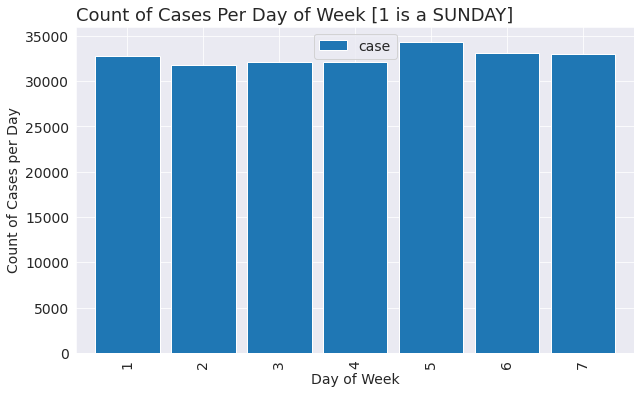

In [6]:
# Group the Crimes per day and produce a bar chart
df_crimes.groupby('day').count().plot(y = 'case',
                                      kind='bar',
                                      figsize=(10,6),
                                      width=0.85,
                                      colormap='tab20')
plt.xlabel('Day of Week')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Cases Per Day of Week [1 is a SUNDAY]', loc='left', fontsize=18)

There is a small increase in crime reported at the weekend, Friday, Saturday and Sunday, but nothing that could be considered significant.

### Number of crimes occuring in each hour

Text(0.0, 1.0, 'Count of Cases Per Hour]')

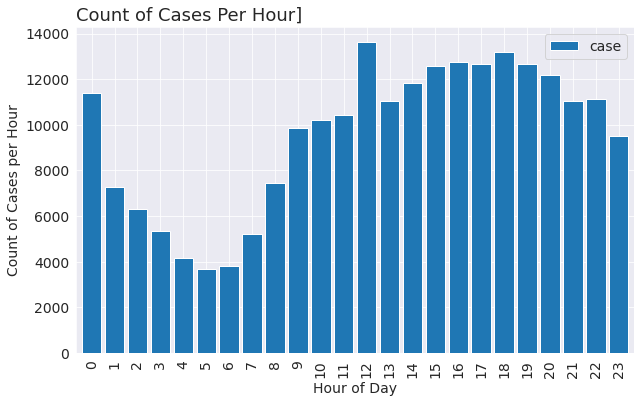

In [7]:
# Group the Crimes per hour and produce a bar chart
df_crimes.groupby('hour').count().plot(y = 'case',
                                       kind='bar',
                                       figsize=(10,6),
                                       width=0.85,
                                       colormap='tab20')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Cases Per Hour]', loc='left', fontsize=18)

There is an expected fall-off in reported crime rates after midnight before elevating again after eight in the morning. There appears to be a spike around midday.

### Now let's look at the Crime Categories.

In [8]:
# Number of unique Crime categories bases on the Primary Description
df_crimes.primary_description.nunique()

32

In [9]:
# What Crimes are the 10 most commonly occuring ones 
df_crimes[['primary_description', 'case']].groupby(
    ['primary_description'], as_index=False).count().sort_values(
    'case', ascending=False).head(10)

,primary_description,case
30,THEFT,52465
2,BATTERY,45332
6,CRIMINAL DAMAGE,25651
1,ASSAULT,18828
9,DECEPTIVE PRACTICE,14390
23,OTHER OFFENSE,13945
18,NARCOTICS,10454
3,BURGLARY,9557
17,MOTOR VEHICLE THEFT,8743
27,ROBBERY,7756


In [10]:
# What Crimes are the 3 most commonly occuring ones 
df_crimes[['primary_description', 'case']].groupby(
    ['primary_description'], as_index=False).count().sort_values(
    'case', ascending=False).head(3)

,primary_description,case
30,THEFT,52465
2,BATTERY,45332
6,CRIMINAL DAMAGE,25651


In [11]:
# Create a list of the 3 most commonly occuring crimes
top_ten_crimes = df_crimes[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:10].axes[0].tolist()

# Create a list of the 3 most commonly occuring crimes
top_three_crimes = df_crimes[['primary_description', 'case']].groupby(
    ['primary_description']).count().sort_values('case', ascending=False)[:3].axes[0].tolist()

In order to get a better understanding of the top three crimes lets first create  smaller dataframe the only contains these top crimes. Next we'll visualise these crimes using area charts.

Text(0.0, 1.0, 'Count of Top 3 Cases Per Month')

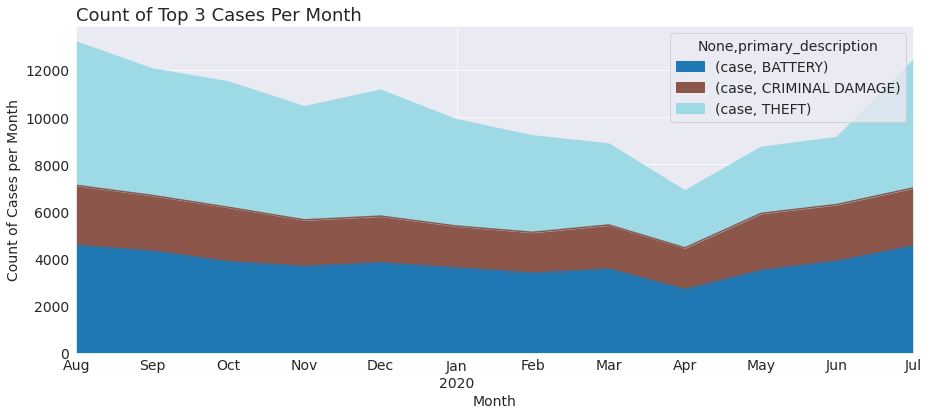

In [12]:
# Create a new data frame with just the top 10 crimes
df_top10_crimes = df_crimes[df_crimes['primary_description'].isin(top_ten_crimes)].copy()

# Create a new data frame with just the top 3 crimes
df_top3_crimes = df_crimes[df_crimes['primary_description'].isin(top_three_crimes)].copy()

# Create a pivot area chart of the crimes per month
df_top3_crimes[['case', 'primary_description', 'year_month']].pivot_table(
    index='year_month', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Month')
plt.ylabel('Count of Cases per Month')
plt.title('Count of Top 3 Cases Per Month', loc='left', fontsize=18)

It would appear that crimes peak in the Summer months and then fall off in Winter. Now look per day.

Text(0.0, 1.0, 'Count of Top 3 Cases Per Day')

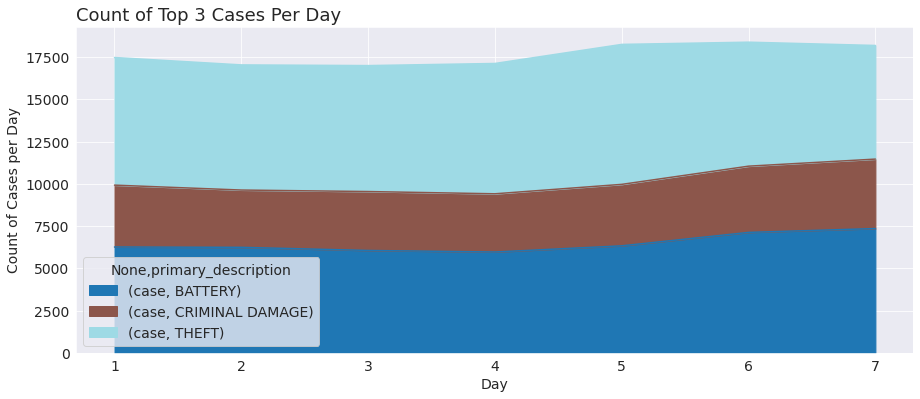

In [13]:
# Create a pivot area chart of the crimes per day
df_top3_crimes[['case', 'primary_description', 'day']].pivot_table(
    index='day', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Day')
plt.ylabel('Count of Cases per Day')
plt.title('Count of Top 3 Cases Per Day', loc='left', fontsize=18)

This chart suggests that Saturday, Sunday & Monday (Tuesday is Day 1) have more more crime but that this increase is driven by the crime of Battery. Finally lets look per hour.

Text(0.0, 1.0, 'Count of Top 3 Cases Per Hour')

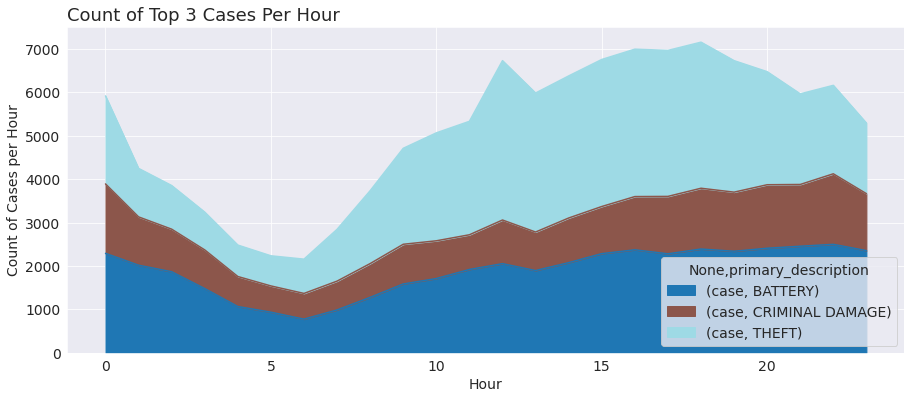

In [14]:
# Create a pivot area chart of the crimes per hour
df_top3_crimes[['case', 'primary_description', 'hour']].pivot_table(
    index='hour', 
    columns='primary_description', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(15, 6),
                          colormap='tab20')

plt.xlabel('Hour')
plt.ylabel('Count of Cases per Hour')
plt.title('Count of Top 3 Cases Per Hour', loc='left', fontsize=18)

It would appear that 6:00 am in the morning is the safest time in Chicago whilst 6:00 pm in the afternoon / evening is the most dangerous.

### Create a folium map with a different colour per crime

Colour each of the top 10 crimes with a different and plot on a Folium map.

In [15]:
# Create a list of 10 colours. 
# We have  list of the top 10 crimes from earlier
colors10 = [
    'red',
    'blue',
    'gray',
    'orange',
    'beige',
    'green',
    'purple',
    'pink',
    'cadetblue',
    'black'
]

# Create a dictionary of colours to map to the crimes
dict_colours10 = dict(zip(top_ten_crimes, colors10))

# Create a list of 3 colours. 
# We have  list of the top 3 crimes from earlier
colors3 = [
    'red',
    'blue',
    'green'
]

# Create a dictionary of colours to map to the crimes
dict_colours3 = dict(zip(top_three_crimes, colors3))

The entire `df_top3_crimes` DataFrame contains too many point to disply effeciently using Folium. To combat this we will just use the data from August 2019.

In [16]:
# Add the colours colums to the df_top_crimes DataFrame
df_top10_crimes['colour'] = df_top10_crimes.primary_description.map(dict_colours10)

# Filter the top 10 crimes dataframe to extract August only
df_top10_crimes_august = df_top10_crimes[df_top10_crimes.month_name == 'August']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top10_crimes_august.to_pickle('/content/gdrive/My Drive/Coursera_Capstone-week5/anh/capstone_pickles/top10crimes_august.pkl')

# Add the colours colums to the df_top_crimes DataFrame
df_top3_crimes['colour'] = df_top3_crimes.primary_description.map(dict_colours3)

# Filter the top 10 crimes dataframe to extract August only
df_top3_crimes_august = df_top3_crimes[df_top3_crimes.month_name == 'August']

# Pickle the DataFrame to Separate the Folium Maps into a Separate Notepad
df_top3_crimes_august.to_pickle('/content/gdrive/My Drive/Coursera_Capstone-week5/anh/capstone_pickles/top3crimes_august.pkl')

Now that the dataframe of crimes with colour has been created all the remains is to generate the Folium Plots

#### Marker Map of the Top 10 Crimes in the month of August

In [17]:
# Define Chicago's geolocation coordinates
chicago_latitude = 41.85  
chicago_longitude = -87.75

In [18]:
# Define the world map centered around Chicago with a higher zoom level
chicago_map = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_map

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the August crimes and add each to the incidents feature group
for lat, lng, col in zip(df_top10_crimes_august.latitude, 
                         df_top10_crimes_august.longitude, 
                         df_top10_crimes_august.colour):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color=col,
            fill=True,
            fill_color=col,
            fill_opacity=0.6
        )
    )

# add incidents to map
chicago_map.add_child(incidents)

Output hidden; open in https://colab.research.google.com to view.

In the map above the crimes data for a single month, August, was super-imposed over a map of Chicago to visualise the distribution of that data. The higher frequency of the top two crimes can be easily seen. Red for Theft and Blue for Battery.

Next the same data was added to a Cluster Map.

In [19]:
mc = MarkerCluster()

# Define the world map centered around Chicago with a higher zoom level
chicago_cluster = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11)

# display world map
chicago_cluster

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df_top10_crimes_august.itertuples():
    mc.add_child(folium.Marker(
        location=[row.latitude,  row.longitude],
                 popup=row.primary_description))
 
chicago_cluster.add_child(mc)
chicago_cluster

Output hidden; open in https://colab.research.google.com to view.

Several obvious clusters of crime locations were visible, particularly in the center of Chicago.

Finally a heat map of the August crimes was created.

In [20]:
from folium import plugins
from folium.plugins import HeatMap

chicago_heatmat = folium.Map(location=[chicago_latitude, chicago_longitude], zoom_start=11) 

# List comprehension to make out list of lists
heat_data = [[row['latitude'], 
              row['longitude']] for index, row in df_top10_crimes_august.iterrows()]

# Plot it on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(chicago_heatmat)

# Display the map
chicago_heatmat

This reinforces the cluster chart where it can clearly be seen that the center of Chicago and the area around Oak Park have a high crime rate occurrence. It will be interesting to see later if there is a high probability of crime in these areas if one of the top listed venues are located in these areas.